При использовании Google Colab используйте следующий код для загрузки датасета:

In [ ]:
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving drug200.csv to drug200.csv


В случае, если не используется Google Colab, начните отсюда:

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('drug200.csv')
label_encoders = {}
categorical_features = ['Sex', 'BP', 'Cholesterol', 'Drug']
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

In [ ]:

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Точность модели: 1.00


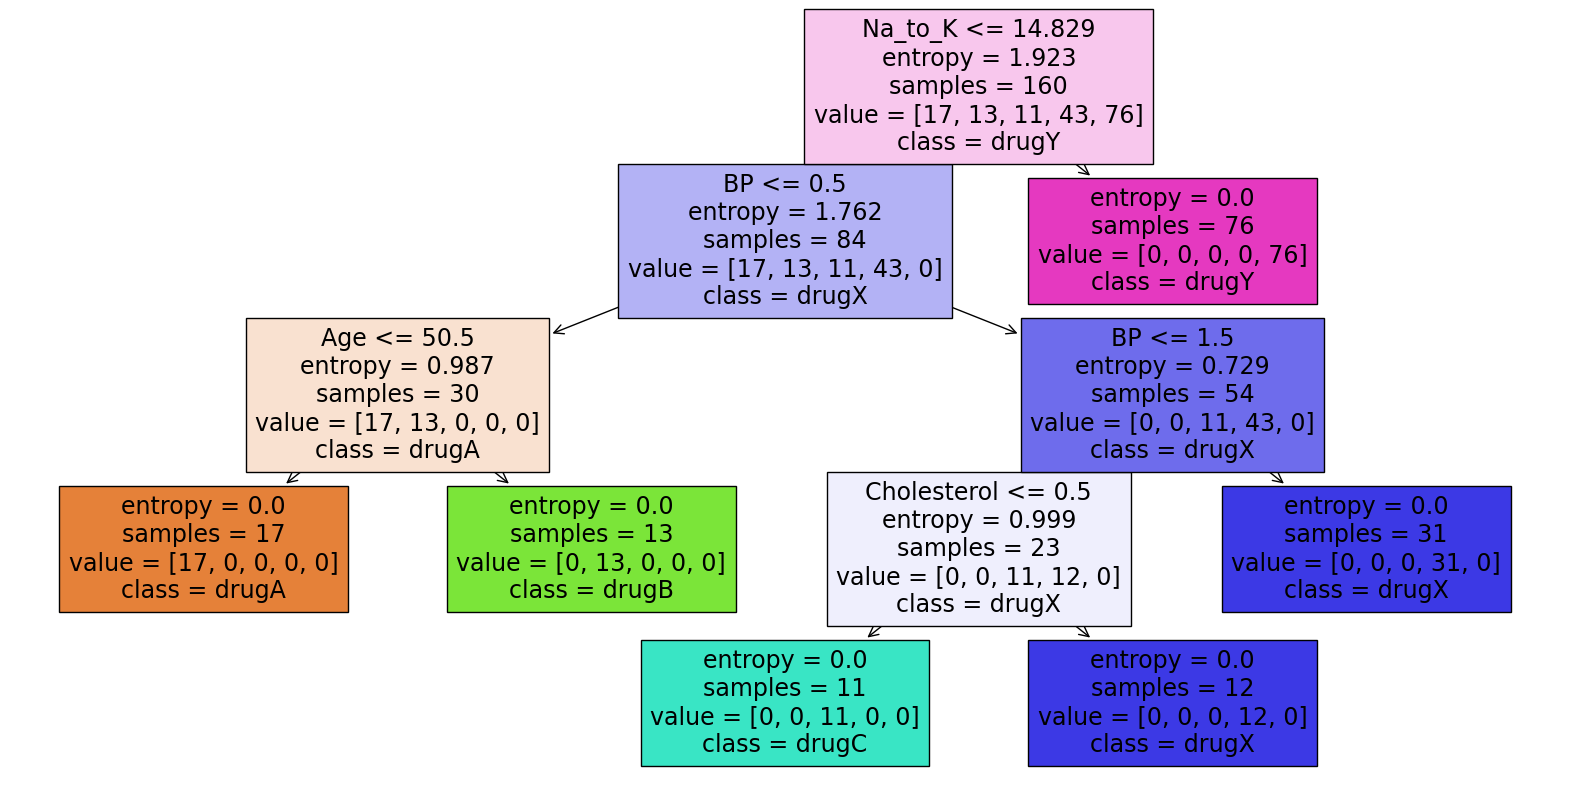

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=label_encoders['Drug'].classes_.tolist(), filled=True)
plt.show()


Пример предсказания для нового пациента

In [ ]:
new_patient = pd.DataFrame({
    'Age': [60],
    'Sex': label_encoders['Sex'].transform(['F']),
    'BP': label_encoders['BP'].transform(['HIGH']),
    'Cholesterol': label_encoders['Cholesterol'].transform(['NORMAL']),
    'Na_to_K': [12.0]
})

predicted_drug = clf.predict(new_patient)
predicted_label = label_encoders['Drug'].inverse_transform(predicted_drug)
print(f"Предсказанный препарат для пациента: {predicted_label[0]}")


Предсказанный препарат для пациента: drugB
